In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For Splitting, Standardizing and encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Random forest regressor for Regression
from sklearn.ensemble import RandomForestRegressor

# Xgboost regressor for regression
from xgboost import XGBRegressor

# For accuracy score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For warning
import warnings
warnings.filterwarnings("ignore")

from google.colab import files
uploaded = files.upload()

Saving dengue_features_test.csv to dengue_features_test (5).csv
Saving dengue_features_train.csv to dengue_features_train (5).csv
Saving dengue_labels_train.csv to dengue_labels_train (5).csv


**Importing all the three datasets.**

In [2]:
import io
df_train_features = pd.read_csv(io.BytesIO(uploaded['dengue_features_train.csv']))
df_train_labels = pd.read_csv(io.BytesIO(uploaded['dengue_labels_train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['dengue_features_test.csv']))

print(df_train_features.shape)
df_train_features.head()

(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
print(df_train_labels.shape)
df_train_labels.head()

(1456, 4)


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:
print(df_test.shape)
df_test.head()

(416, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


**Data preprocessing for Train dataset.**

In [5]:
le = LabelEncoder()

df_train_features['week_start_date'] = df_train_features['week_start_date'].astype('datetime64').astype(int).astype(float)

df_train_features['city'] = le.fit_transform(df_train_features['city'])
df_train_features['week_start_date'] = le.fit_transform(df_train_features['week_start_date'])

In [6]:
column = []
cols_dtype = [i for i in df_train_features.dtypes]
for i,j in zip(df_train_features.columns, cols_dtype):
  if j!='object':
    column.append(i)
df_train_features[column] = df_train_features[column].fillna(df_train_features.mean())

**Final Train dataset.**

In [7]:
New_df = df_train_features[column]
New_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,1990,18,0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1,1990,19,1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1,1990,20,2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1,1990,21,3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1,1990,22,4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
New_df_le = New_df.apply(LabelEncoder().fit_transform)
New_df_le.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,0,17,0,566,609,726,602,154,280,116,66,15,79,497,82,154,71,74,86,123,5,30,129
1,1,0,18,1,681,759,407,422,280,462,204,294,26,84,284,364,280,281,56,196,86,16,53,67
2,1,0,19,2,256,861,363,546,417,628,260,588,22,93,422,822,417,571,51,196,94,20,59,313
3,1,0,20,3,587,1104,942,989,187,673,306,561,31,90,226,671,187,524,60,284,114,32,64,26
4,1,0,21,4,760,1149,1057,1038,89,809,364,675,36,95,192,682,89,646,101,453,283,49,69,41


**Data preprocessing for test dataset**

In [9]:
df_test['week_start_date'] = df_test['week_start_date'].astype('datetime64').astype(int).astype(float)

df_test['city'] = le.fit_transform(df_test['city'])
df_test['week_start_date'] = le.fit_transform(df_test['week_start_date'])

In [10]:
column = []
cols_dtype = [i for i in df_test.dtypes]
for i,j in zip(df_test.columns, cols_dtype):
  if j!='object':
    column.append(i)
df_test[column] = df_test[column].fillna(df_test.mean())

In [11]:
New_df_test = df_test[column]
New_df_test.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,2008,18,0,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,1,2008,19,1,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,1,2008,20,2,-0.001500,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,1,2008,21,3,0.126050,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,1,2008,22,4,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,1,2008,23,5,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,299.728571,295.314286,301.9,297.6,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,1,2008,24,6,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,300.007143,295.650000,302.4,297.5,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,1,2008,25,7,0.126050,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,295.997143,303.5,297.5,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,1,2008,26,8,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,300.621429,296.268571,302.5,298.5,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,1,2008,27,9,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,300.528571,296.411429,302.3,298.7,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


**Final Test dataset.**

In [12]:
New_df_test_le = New_df_test.apply(LabelEncoder().fit_transform)

**y containing the label column and 
X containing the features column.**

In [14]:
y = df_train_labels['total_cases']

In [15]:
X = New_df_le

In [16]:
X.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,0,17,0,566,609,726,602,154,280,116,66,15,79,497,82,154,71,74,86,123,5,30,129
1,1,0,18,1,681,759,407,422,280,462,204,294,26,84,284,364,280,281,56,196,86,16,53,67
2,1,0,19,2,256,861,363,546,417,628,260,588,22,93,422,822,417,571,51,196,94,20,59,313
3,1,0,20,3,587,1104,942,989,187,673,306,561,31,90,226,671,187,524,60,284,114,32,64,26
4,1,0,21,4,760,1149,1057,1038,89,809,364,675,36,95,192,682,89,646,101,453,283,49,69,41
5,1,0,22,5,615,872,1075,633,115,836,378,683,41,101,428,632,115,648,37,366,126,43,69,299
6,1,0,23,6,535,561,782,838,34,731,304,687,30,97,576,819,34,655,33,276,114,20,64,241
7,1,0,24,7,398,457,323,273,1126,825,346,912,23,104,477,908,1126,894,4,394,179,38,59,170
8,1,0,25,8,495,775,188,217,237,822,350,860,38,97,563,877,237,825,22,389,157,38,59,170
9,1,0,26,9,615,675,391,778,175,968,447,961,40,107,459,757,175,928,31,389,96,38,71,6


**Splitting of the dataset using train_test_split method.**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [18]:
X_train.shape ,y_train.shape

((946, 24), (946,))

**Standard Scaler for scaling of the data for training purpose.**

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**XGBOOST REGRESSOR**

In [20]:
xgbr = XGBRegressor(verbosity=0)

In [21]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

*Prediction accuracy.*

In [22]:
xgbr_score = xgbr.score(X_train, y_train)
xgbr_score

0.9364520401360259

**Prediction on X_test dataset using Xgb regressor.**

In [23]:
y_pred_xgb = xgbr.predict(X_test) 

**RANDOM FOREST REGRESSOR**

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [25]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

*Random forest regression score.*

In [26]:
rfr_score = rfr.score(X_test, y_test)
rfr_score

0.6520171506313421

**Prediction on X_test using random forest regressor.**

In [27]:
y_predicted = rfr.predict(X_test)
y_predicted = np.array(y_predicted)

**Dataframe containing arranged in descending order of model's score.**

In [28]:
models = pd.DataFrame({   
    'Model': ['XGBoost Regressor', 'Random Forest Regressor'],
    'Score': [xgbr_score, rfr_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,XGBoost Regressor,0.936452
1,Random Forest Regressor,0.652017


*Since XGBoost gives around 93.6 % accuracy. So this algorithm is more suited for prediction.*

**Distribution plot for y_pred_xgb.**

Text(0.5, 1.0, 'Graph for y_pred_xgb')

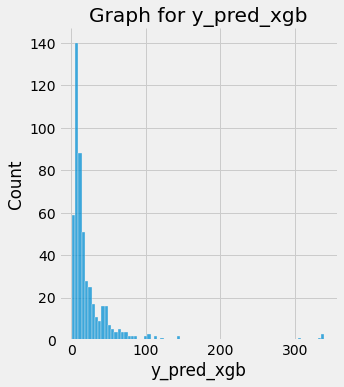

In [41]:
sns.displot(y_pred_xgb)
plt.xlabel('y_pred_xgb')
plt.title('Graph for y_pred_xgb')

**Distribution plot for y_predicted.**

Text(0.5, 1.0, 'Graph for y_predicted')

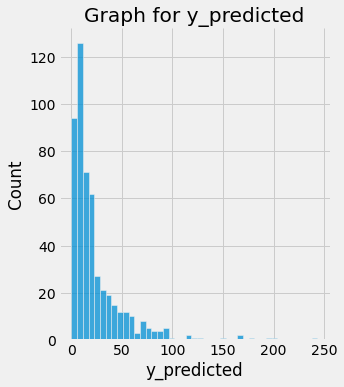

In [42]:
sns.displot(y_predicted)
plt.xlabel('y_predicted')
plt.title('Graph for y_predicted')

**True value vs Predicted value**

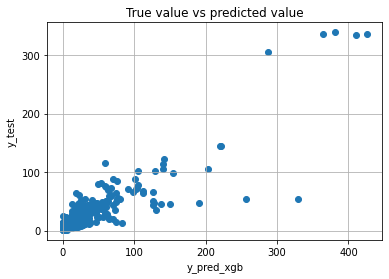

In [31]:
plt.scatter(y_test, y_pred_xgb)

plt.xlabel('y_pred_xgb')
plt.ylabel('y_test')

plt.title('True value vs predicted value')

plt.grid(True)

plt.style.use('fivethirtyeight')

**R2, Mean Absolute score and Mean Squared score.**

In [32]:
print('R2 score : ', round(r2_score(y_test, y_pred_xgb)*100, 2))
print('MAE score : ', mean_absolute_error(y_test, y_pred_xgb))
print('MSE score : ', mean_squared_error(y_test, y_pred_xgb))

R2 score :  76.42
MAE score :  11.120255340898739
MSE score :  596.25326560997


**"total_cases" was predicted from test dataset using Xgboost algorithm.**

In [33]:
New_df_test_le['total_cases'] = xgbr.predict(New_df_test_le.values)
New_df_test_le['total_cases']

0      100.089203
1      104.042419
2      151.870834
3      131.138489
4      151.870834
          ...    
411    140.613586
412    140.613586
413    140.613586
414    140.613586
415    140.613586
Name: total_cases, Length: 416, dtype: float32

**Conversion from float64 to int64 for submission purpose.**

In [34]:
New_df_test_le['total_cases'] = New_df_test_le['total_cases'].astype('int64')

In [35]:
New_df_test_le['total_cases']

0      100
1      104
2      151
3      131
4      151
      ... 
411    140
412    140
413    140
414    140
415    140
Name: total_cases, Length: 416, dtype: int64

# Submission File in CSV format.

In [36]:
New_df_test = pd.concat([New_df_test, New_df_test_le[['total_cases']]], axis = 1)

In [40]:
New_df_test.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2008,18,iq,-0.018900,-0.018900,0.102729,0.091200,78.6,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.6,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,100
1,sj,2008,19,sj,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,104
2,sj,2008,20,2,-0.001500,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3,151
3,sj,2008,21,3,0.126050,-0.019867,0.124329,0.125686,iq,299.690000,299.728571,294.402857,303.0,296.9,2.2,73.015714,iq,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,131
4,sj,2008,22,4,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,151
5,sj,2008,23,5,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,299.728571,295.314286,301.9,297.6,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7,151
6,sj,2008,24,6,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,300.007143,295.650000,302.4,297.5,13.1,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7,151
7,sj,2008,25,7,0.126050,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,295.997143,303.5,297.5,7.2,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3,151
8,sj,2008,26,8,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,300.621429,296.268571,302.5,298.5,17.1,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7,151
9,sj,2008,27,9,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,300.528571,296.411429,302.3,298.7,11.9,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9,151


In [37]:
New_df_test = New_df_test.replace({0:'iq',1:'sj'})

In [38]:
New_df_test[['city','year','weekofyear','total_cases']].to_csv('Xgbr_submit.csv', index = False)